# Background Removal

*   IVAN LOPEZ RODRIGUEZ

## 1.- Planteamiento del proyecto

### 1.1.- Explicación del proyecto a resolver

- The idea of the proyect is to remove the background of an image using a mask (computed by the neural network).

### 1.2.- Como se pretende resolver el problema en un principio.

- In order to solve this exercise I am going to create an autoencoder with some CNN.

### 1.3.- Qué datos y cómo deberían ser los datos que harían falta para resolver este problema.

- We need images as inputs and outputs. The input images work with 3 channels (RGB), however, the ouput images will be defined in 1 channel, being black as the background and white as the foreground.

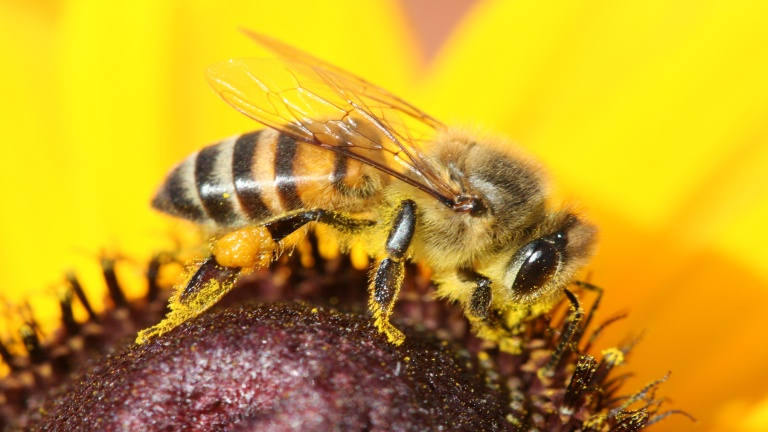

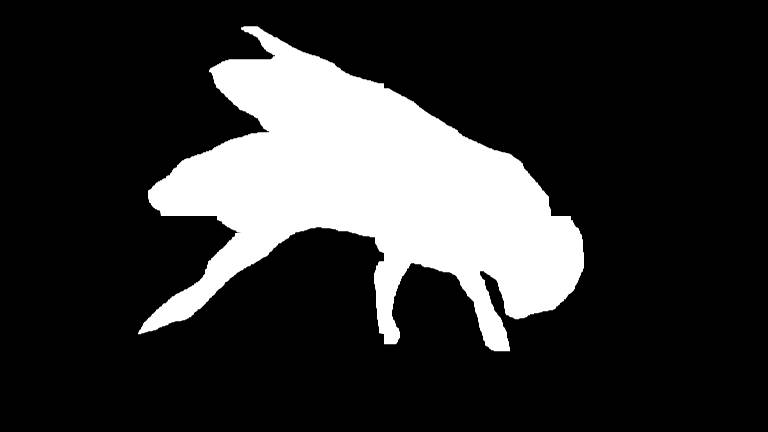

In [ ]:
# IF YOU RE-EXECUTE THE WHOLE CODE, BE AWARE THAT SOME DEFINITIONS NEEDED TO EXECUTE THIS CELL ARE BELOW
img = cv2.imread(path + "X/100.jpg")
cv2_imshow(img)

img = cv2.imread(path + "Y/100_mask.jpg")
cv2_imshow(img)

### 1.4.- Cómo debería ser el modelo que permita resolver esto y qué adaptación tendría que hacer a los datos.

- As I said before, the model will have an architecture as an autoencoder with CNN, and it will try to create a mask of the input.

## 2.- Implementación del proyecto

### 2.1.- Sección para hacer todos los imports del proyecto (no poner imports que no utilicéis)

In [2]:
# AS I AM EXECUTING THIS ON COLAB, I WILL SEARCH THE IMAGES ON DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%load_ext tensorboard

import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### 2.2.- Sección para todo lo relacionado con la adaptación, creación, preparación y carga del/los dataset.

In [128]:
def _load_images(i1,i2):
  img1 = tf.io.read_file(i1[0])
  img2 = tf.io.read_file(i2[0])

  img1 = tf.image.decode_jpeg(img1, channels = 3)
  img2 = tf.image.decode_jpeg(img2, channels = 1)

  img1 = tf.cast(img1, tf.float32)/255
  img2 = tf.cast(img2, tf.float32)/255

  img1 = tf.image.resize(img1, (128,128))
  img2 = tf.image.resize(img2, (124,124))
  #img2 = tf.image.resize(img2, (128,128))
  
  # if i1[1] == "1" and i2[1] == "1":
  #   img1 = tf.image.flip_left_right(img1)
  #   img2 = tf.image.flip_left_right(img2)

  # elif i1[1] == "2" and i2[1] == "2":
  #   img1 = tf.image.flip_up_down(img1)
  #   img2 = tf.image.flip_up_down(img2)

  if i1[1] == "3" and i2[1] == "3":
    img1 = tf.image.flip_left_right(img1)
    img2 = tf.image.flip_left_right(img2)
    img1 = tf.image.flip_up_down(img1)
    img2 = tf.image.flip_up_down(img2)
  
  
  return img1,img2

def create_flips(paths):
  s = []

  for p in paths:
    s.append((p, "0"))
    s.append((p, "1"))
    s.append((p, "2"))
    s.append((p, "3"))

  return s

In [129]:
path = "/content/drive/MyDrive/JEDI_DL/proyect/dataset/"
#path = "./dataset/" ## THIS PATH MAY WORK IF YOU EXECUTE THIS LOCALLY

print(len(os.listdir(path + "X")))

X = [path + "X/" + name for name in os.listdir(path + "X")]
Y = [path + "Y/" + name for name in os.listdir(path + "Y")]

X.sort()
Y.sort()

input = create_flips(X)
output = create_flips(Y)

X_train, X_test, Y_train, Y_test = train_test_split(input,output,train_size=0.9,random_state=42, shuffle = False)

train_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(Y_train)))
test_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_test), tf.constant(Y_test)))

train_data = train_dataset.map(_load_images).cache().batch(8)
test_data = test_dataset.map(_load_images).cache().batch(8)

138


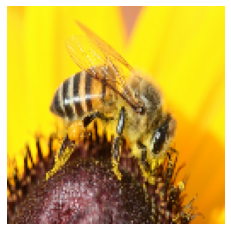

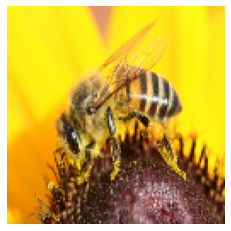

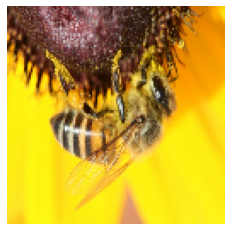

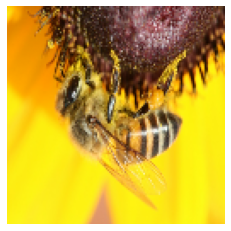

Size of the image:  (8, 128, 128, 3)
Expected output:


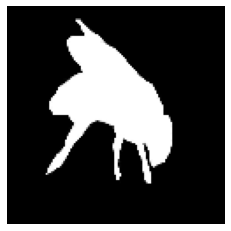

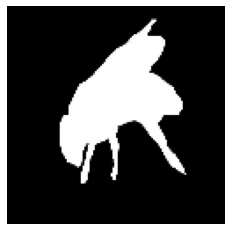

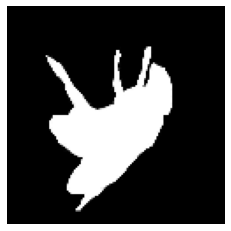

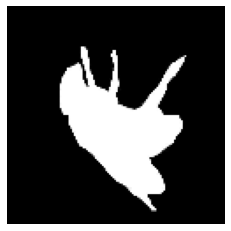

In [63]:
for image,l in train_data.take(1):
  plt.figure()
  plt.imshow(image[0])
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(image[1])
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(image[2])
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(image[3])
  plt.axis('off')
  plt.show()
  
  print("Size of the image: ", image.shape)
  
  print("Expected output:")
  plt.figure()
  plt.imshow(np.reshape(l[0],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(np.reshape(l[1],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(np.reshape(l[2],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()
  plt.figure()
  plt.imshow(np.reshape(l[3],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()

### 2.3.- Sección para construir el modelo/s y presentar su estructura.

In [8]:
# def get_model():
#     model = keras.models.Sequential()
#     model.add(layers.Conv2D(16, 3, activation = 'relu', input_shape = (128,128,3)))
#     model.add(layers.MaxPooling2D())
#     model.add(layers.Conv2D(32, 3, activation = 'relu'))
#     model.add(layers.MaxPooling2D())
#     model.add(layers.Conv2D(64, 3, activation = 'relu'))
#     model.add(layers.Conv2D(64, 3, activation = 'relu'))
#     model.add(layers.MaxPooling2D())
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation = 'relu'))
#     model.add(layers.Dropout(0.15))
#     model.add(layers.Reshape((1,1,128)))
#     model.add(layers.UpSampling2D())
#     model.add(layers.Conv2DTranspose(64, 3, activation = 'relu'))
#     model.add(layers.Conv2DTranspose(64, 3, activation = 'relu'))
#     model.add(layers.UpSampling2D())
#     model.add(layers.Conv2DTranspose(32, 3, activation = 'relu'))
#     model.add(layers.UpSampling2D())
#     model.add(layers.Conv2DTranspose(16, 3, activation = 'relu'))
#     model.add(layers.UpSampling2D())
#     model.add(layers.Conv2DTranspose(1, 3, activation = 'relu'))
#     model.add(layers.Conv2DTranspose(1, 3, activation = 'sigmoid'))
#     model.add(layers.UpSampling2D())
#     model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
#     return model

In [131]:
def get_last_chance():
  input_img = keras.Input(shape=(128, 128, 3))

  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

  # at this point the representation is (4, 4, 8) i.e. 128-dimensional

  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = layers.UpSampling2D((2, 2))(x)
  decoded = layers.Conv2D(1, (4, 4), activation='sigmoid', padding='same')(x)

  autoencoder = keras.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return autoencoder

In [103]:
# def get_model_unet():
#     inputs = keras.Input(shape = (128,128,3))

#     ### [First half of the network: downsampling inputs] ###

#     # Entry block
#     x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("sigmoid")(x)

#     previous_block_activation = x  # Set aside residual

#     # Blocks 1, 2, 3 are identical apart from the feature depth.
#     for filters in [64, 128, 256]:
#         x = layers.Activation("sigmoid")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("sigmoid")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

#         # Project residual
#         residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     ### [Second half of the network: upsampling inputs] ###

#     for filters in [256, 128, 64, 32]:
#         x = layers.Activation("sigmoid")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("sigmoid")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.UpSampling2D(2)(x)

#         # Project residual
#         residual = layers.UpSampling2D(2)(previous_block_activation)
#         residual = layers.Conv2D(filters, 1, padding="same")(residual)
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     # Add a per-pixel classification layer
#     outputs = layers.Conv2D(1, 3, activation="softmax", padding="same")(x)

#     # Define the model
#     model = keras.Model(inputs, outputs)
#     model.compile(optimizer="rmsprop", loss="mse", metrics = ['accuracy'])
#     return model

In [ ]:
# model1 = get_model()
# model1.summary()

In [132]:
auto = get_last_chance()
auto.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_84 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 32, 32, 8)         584

In [ ]:
# model2 = get_model_unet()
# model2.summary()

### 2.4.- Sección para la parte del entrenamiento del/los modelo/s y la utilización de los diferentes mecanismos de callbacks.

In [106]:
c1 = tf.keras.callbacks.EarlyStopping(
 monitor="val_accuracy",
 min_delta=0,
 patience=10,
 verbose=1,
 mode="auto",
 baseline=None,
 restore_best_weights=True,
)

In [107]:
c2 = tf.keras.callbacks.ReduceLROnPlateau(
 monitor="val_accuracy",
 factor=0.5,
 patience=5,
 verbose=1,
 mode="auto",
 min_delta=0.0001,
 cooldown=0,
 min_lr=0
)

In [ ]:
# history = model1.fit(train_data, epochs = 100, validation_data = test_data, verbose = 1, callbacks = [c1, c2])

In [141]:
history1 = auto.fit(train_data, epochs = 100, validation_data = test_data, verbose = 1, callbacks = [c1, c2])

Epoch 1/100
62/62 [==============================] - 1s 18ms/step - loss: 0.5059 - accuracy: 0.7251 - val_loss: 0.4952 - val_accuracy: 0.7317 - lr: 2.5000e-04
Epoch 2/100
62/62 [==============================] - 1s 16ms/step - loss: 0.5028 - accuracy: 0.7275 - val_loss: 0.4925 - val_accuracy: 0.7336 - lr: 2.5000e-04
Epoch 3/100
62/62 [==============================] - 1s 16ms/step - loss: 0.5015 - accuracy: 0.7289 - val_loss: 0.4904 - val_accuracy: 0.7361 - lr: 2.5000e-04
Epoch 4/100
62/62 [==============================] - 1s 16ms/step - loss: 0.5005 - accuracy: 0.7298 - val_loss: 0.4896 - val_accuracy: 0.7368 - lr: 2.5000e-04
Epoch 5/100
62/62 [==============================] - 1s 16ms/step - loss: 0.4998 - accuracy: 0.7304 - val_loss: 0.4892 - val_accuracy: 0.7371 - lr: 2.5000e-04
Epoch 6/100
62/62 [==============================] - 1s 16ms/step - loss: 0.4991 - accuracy: 0.7310 - val_loss: 0.4887 - val_accuracy: 0.7374 - lr: 2.5000e-04
Epoch 7/100
62/62 [===========================

In [ ]:
# history2 = model2.fit(train_data, epochs = 100, validation_data = test_data, verbose = 1, callbacks = [c1, c2])

### 2.5.- Sección para probar el funcionamiento del/los modelo/s entrenado/s empleando ejemplo/s de test.

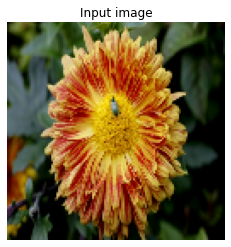

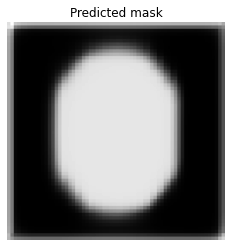

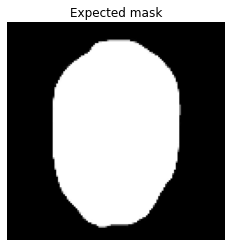

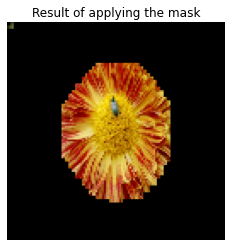

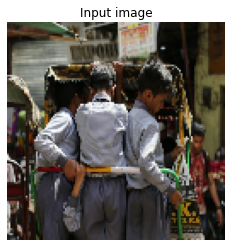

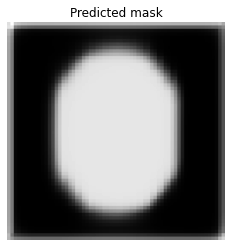

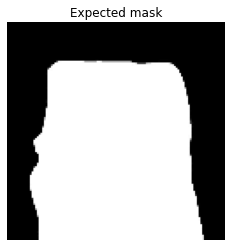

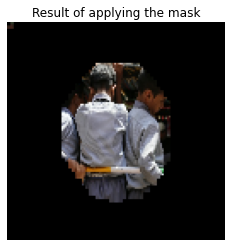

In [134]:
for image,mask in test_data.take(2):
  plt.figure()
  plt.title("Input image")
  plt.imshow(image[0])
  plt.axis('off')
  plt.show()

  image_aux = tf.reshape(image[0], (1,128,128,3))
  prediction = model1.predict(image_aux)

  plt.title("Predicted mask")
  plt.imshow(np.reshape(prediction,(128,128)), cmap = 'gray')
  plt.axis('off')
  plt.show()

  plt.title("Expected mask")
  plt.imshow(np.reshape(mask[0],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()

  plt.title("Result of applying the mask")
  plt.imshow(np.reshape((image[0].numpy() * np.around(prediction)), (128,128,3)))
  plt.axis('off')
  plt.show()

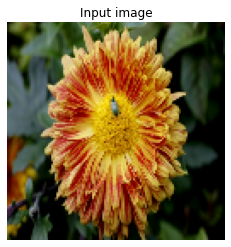

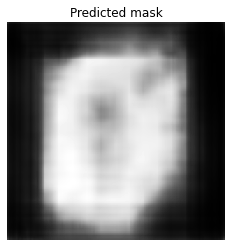

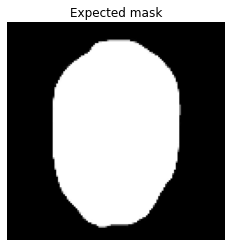

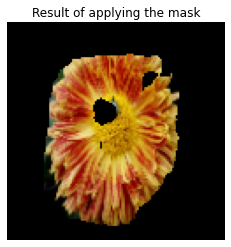

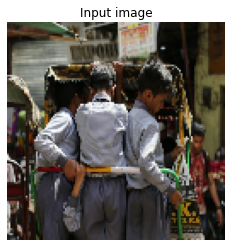

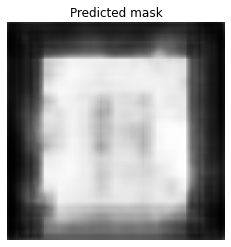

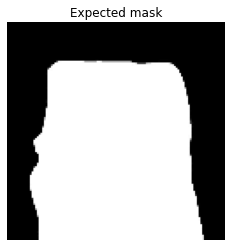

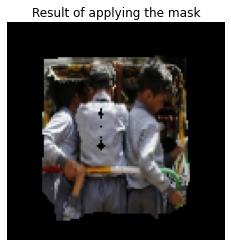

In [142]:
for image,mask in test_data.take(2):
  plt.figure()
  plt.title("Input image")
  plt.imshow(image[0])
  plt.axis('off')
  plt.show()

  image_aux = tf.reshape(image[0], (1,128,128,3))
  prediction = auto.predict(image_aux)

  plt.title("Predicted mask")
  plt.imshow(np.reshape(prediction,(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()

  plt.title("Expected mask")
  plt.imshow(np.reshape(mask[0],(124,124)), cmap = 'gray')
  plt.axis('off')
  plt.show()

  plt.title("Result of applying the mask")
  tf.image.resize(image[0], (124,124))
  plt.imshow(np.reshape((tf.image.resize(image[0], (124,124)).numpy() * np.around(prediction)), (124,124,3)))
  plt.axis('off')
  plt.show()

### 2.6.- Sección para el código asociado a guardar y cargar el/los modelo/s.

In [145]:
#model1.save("/content/drive/MyDrive/JEDI_DL/proyect/trained/bck_removal")
#model1 = tf.keras.models.load_model("/content/drive/MyDrive/JEDI_DL/proyect/trained/bck_removal")

#auto.save("/content/drive/MyDrive/JEDI_DL/proyect/trained/bck_removal/autoencoder")
#auto = tf.keras.models.load_model("/content/drive/MyDrive/JEDI_DL/proyect/trained/bck_removal/autoencoder")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/JEDI_DL/proyect/trained/bck_removal/autoencoder/assets


### 2.7.- Sección para la implementación de una función sencilla que permita utilizar vuestro/s modelo/s con 1 dato/ejemplo.

In [121]:
def predict_image(model, input_path, output_path):
    image = tf.io.read_file(input_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (128,128))
    image = tf.cast(image, tf.float32)/255

    image2 = tf.io.read_file(output_path)
    image2 = tf.image.decode_jpeg(image2, channels=1)
    image2 = tf.image.resize(image2, (124,124))

    plt.figure()
    plt.title("Input image")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    image = tf.reshape(image, (1,128,128,3))
    prediction = model.predict(image)

    plt.title("Predicted mask")
    #plt.imshow(np.reshape(np.around(prediction),(128,128)), cmap = 'gray') ## USED FOR MODEL1 AND MODEL2
    plt.imshow(np.reshape(np.around(prediction),(124,124)), cmap = 'gray')
    plt.axis('off')
    plt.show()

    plt.title("Expected mask")
    plt.imshow(np.reshape(image2,(124,124)), cmap = 'gray')
    plt.axis('off')
    plt.show()

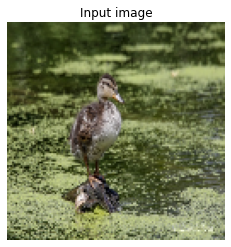

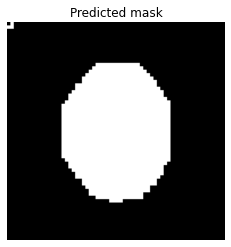

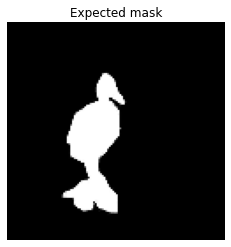

In [118]:
predict_image(model1, path + "X/2.jpg", path + "Y/2_mask.jpg")

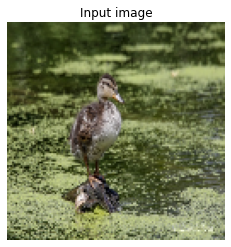

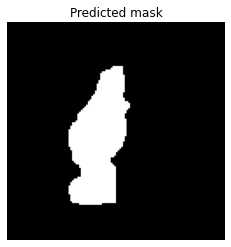

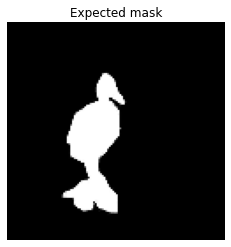

In [144]:
predict_image(auto, path + "X/2.jpg", path + "Y/2_mask.jpg")

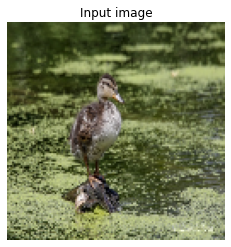

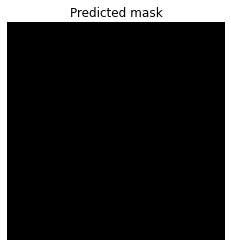

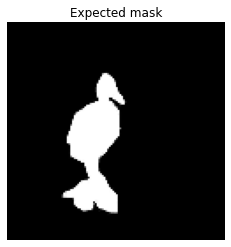

In [119]:
predict_image(model2, path + "X/2.jpg", path + "Y/2_mask.jpg")

## 3.- Análisis de resultados

### 3.1.- Presenta las gráficas de entrenamiento del/los modelo/s anteriormente entrenado/s.

In [138]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

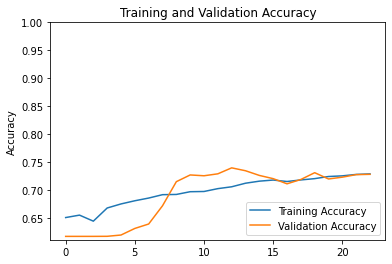

In [139]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

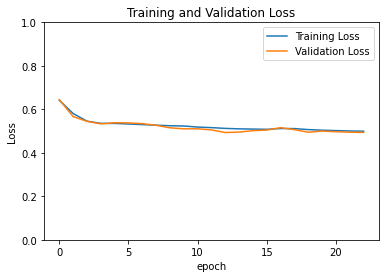

In [140]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 3.2.- Explica cómo ha ido el proceso de entrenamiento (hay algo extraño? se ha entrenado correctamente? se ha estancado?...)

- We are plotting the training of the autoencoder model, which seems to fit the masks better. The model has trained correctly, being more ambiguous on the first epochs, although it finally reaches an accuracy close to 75%.

## 4.- Conclusiones

### 4.1.- Se ha resuelto el proyecto como se esperaba? (explicación)

- Talking about the results obtained with the autoencoder model, I would say that the model has computed what I expected. However, I wanted to create my own architecture as I did with the first model, but I observed that had some errors and I didn't really have enough time to fix it. Nevertheless, I obviously had to make some changes in order to get the final results.

### 4.2.- Que dificultades se han encontrado a la hora de enfrentarse a este proyecto?

- The first "problem" of the proyect has been the creation of the dataset, as I had to make it manually, taking some images and creating their mask.

- I won't say that it was that hard as creating the dataset, but the architecure of the model and fitting the dimensions between the layers, it also has been tough work.

### 4.3.- Si tuvieras más tiempo/recursos y empezaras de nuevo a resolver este problema, lo harías de la misma forma? cambiarías algo?

- If I had more time, I trully think that I could get better results. However, I won't change anything, because I have been able to learn a lot.

### 4.4.- Propuesta de mejoras (Como evolucionarías este proyecto, que podría cambiarse, ...)

- I think that the final model works correctly, and we could maybe get better results if we train it with more data.